In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os,zipfile
plt.rcParams.update({'font.size': 22})


In [12]:
# os.mkdir('dataset')
dataset= 'dataset'
target_file = 'tesla-stock-price.zip'

In [11]:
with zipfile.ZipFile(target_file, 'r') as extracting:
    extracting.extractall(dataset)

In [13]:
df = pd.read_csv(f'{dataset}/Tesla.csv - Tesla.csv.csv', header=None)
df=df.iloc[1:]

df[0] = pd.to_datetime(df[0])
df[4] = pd.to_numeric(df[4])
df[3] = pd.to_numeric(df[3])
df[2] = pd.to_numeric(df[2])
df[1] = pd.to_numeric(df[1])
df.tail()

,0,1,2,3,4,5,6
1688,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1689,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258
1690,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1691,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1692,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.5


In [14]:
train = df[0:1200]
valid = df[1200:]

x_train = train.iloc[:,[1,2,3]]
y_train = train.iloc[:,4]
date_train=train.iloc[:,0]
x_valid = valid.iloc[:,[1,2,3]]
y_valid = valid.iloc[:,4]
date_valid=valid.iloc[:,0]
date_train[1200]

Timestamp('2015-04-06 00:00:00')

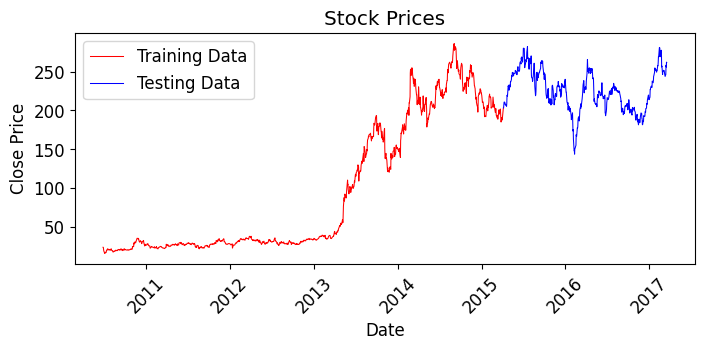

In [15]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(date_train, y_train, color = 'red', marker='', linewidth='0.75')
ax.plot(date_valid, y_valid, color = 'blue', marker='', linewidth='0.75')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(['Training Data', 'Testing Data'], loc='upper left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_valid)

In [17]:
import math
err=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred[i-1201]
    err.append(a)
    SUM = SUM + pow(a,2)
(SUM/492)

3.7774980786312553

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
s_train = scaler.fit_transform(x_train)
s_valid = scaler.transform(x_valid)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(algorithm='auto', leaf_size=10)
knn.fit(s_train, y_train)
pred2 = knn.predict(s_valid)

In [20]:
import math
err2=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred2[i-1201]
    err2.append(a)
    SUM = SUM + pow(a,2)
(SUM/492)


6.624084976802166

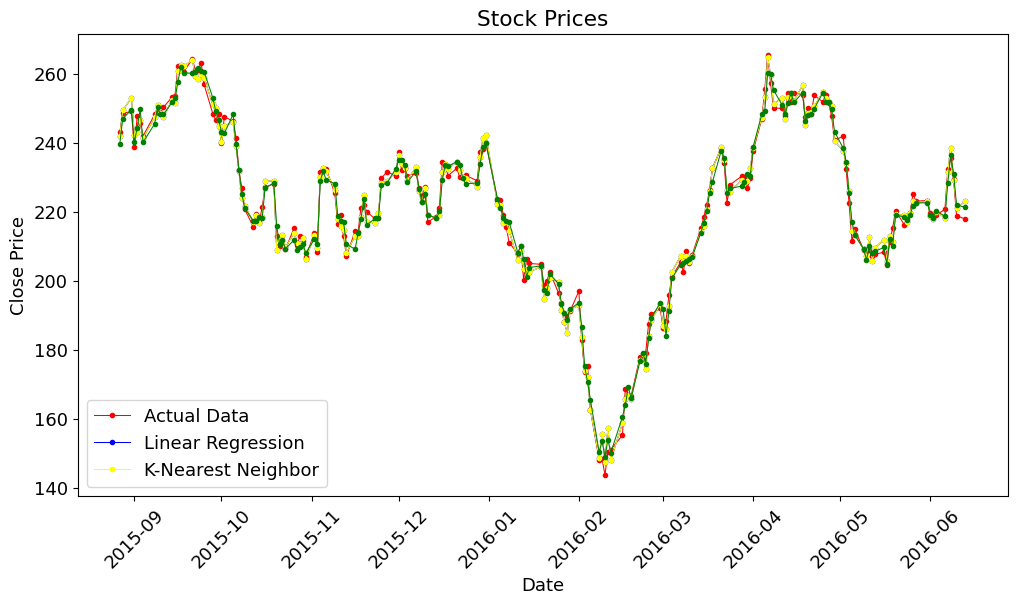

In [27]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:300], y_valid[100:300], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred[100:300], color = 'blue', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred[100:300], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred2[100:300], color = 'green', marker='.', linewidth='0.75')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'Linear Regression', 'K-Nearest Neighbor'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(x_train,y_train)
pred3 = lasso.predict(x_valid)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+03, tolerance: 8.697e+02
  model = cd_fast.enet_coordinate_descent(


In [29]:
import math
err3=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred3[i-1201]
    err3.append(a)
    SUM = SUM + pow(a,2)
SUM/492

10.366449017145742

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train,y_train)
pred4 = ridge.predict(x_valid)

In [31]:
import math
err4=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred4[i-1201]
    err4.append(a)
    SUM = SUM + pow(a,2)
SUM/492

3.7773925218231836

In [32]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred4[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

0.698163791779087

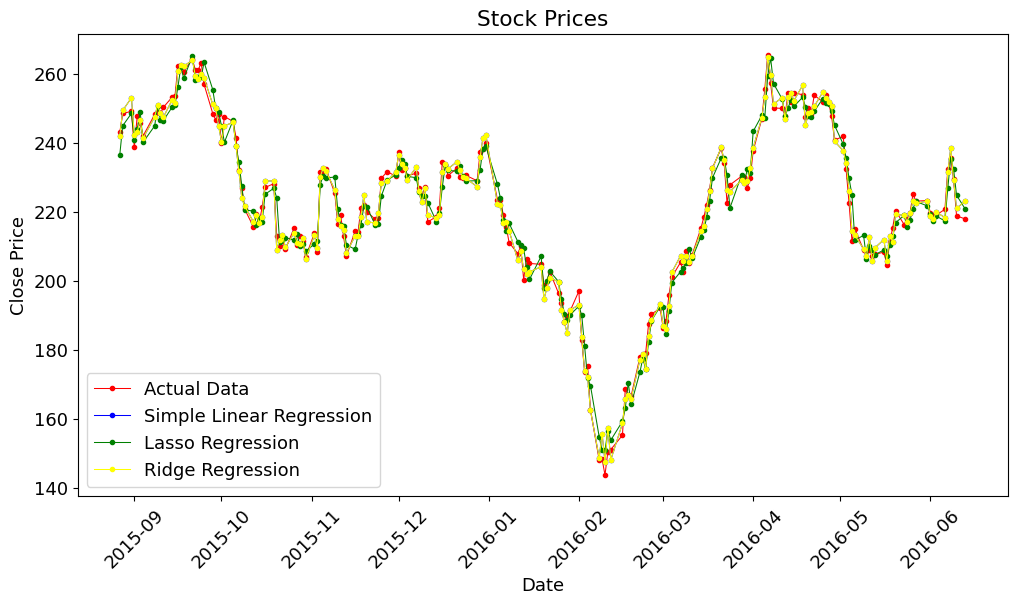

In [34]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:300], y_valid[100:300], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred[100:300], color = 'blue', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred3[100:300], color = 'green', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred4[100:300], color = 'yellow', marker='.', linewidth='0.75')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'Simple Linear Regression', 'Lasso Regression', 'Ridge Regression'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");

In [35]:
from sklearn.ensemble import RandomForestRegressor 

rforest = RandomForestRegressor(n_estimators = 100, random_state = 1) 
rforest.fit(x_train,y_train)
pred51 = rforest.predict(x_valid)
rforest = RandomForestRegressor(n_estimators = 250, random_state = 0) 
rforest.fit(x_train,y_train)
pred52 = rforest.predict(x_valid)
rforest = RandomForestRegressor(n_estimators = 500, random_state = 1) 
rforest.fit(x_train,y_train)
pred53 = rforest.predict(x_valid)
rforest = RandomForestRegressor(n_estimators = 1000, random_state = 0) 
rforest.fit(x_train,y_train)
pred54 = rforest.predict(x_valid)

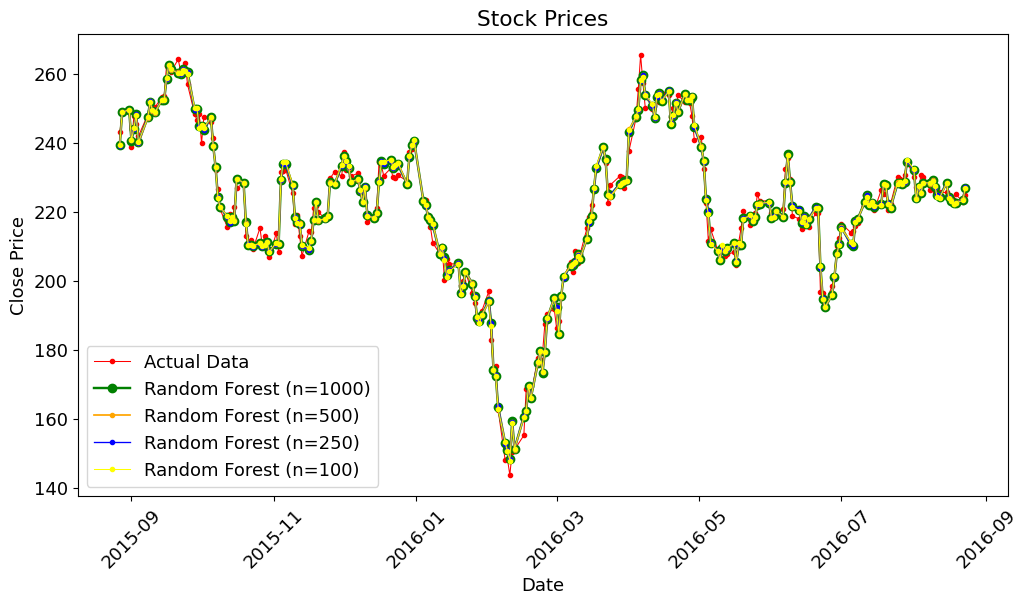

In [36]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:350], y_valid[100:350], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:350], pred54[100:350], color = 'green', marker='o', linewidth='1.75')
ax.plot(date_valid[100:350], pred53[100:350], color = 'orange', marker='.', linewidth='1.25')
ax.plot(date_valid[100:350], pred52[100:350], color = 'blue', marker='.', linewidth='0.95')
ax.plot(date_valid[100:350], pred51[100:350], color = 'yellow', marker='.', linewidth='0.75')
plt.xticks(rotation=45)

plt.legend(['Actual Data', 'Random Forest (n=1000)', 'Random Forest (n=500)', 'Random Forest (n=250)', 'Random Forest (n=100)'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [37]:
import math
err5=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred54[i-1201]
    err5.append(a)
    SUM = SUM + pow(a,2)
SUM/492

6.952492376170979

In [39]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred51[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

0.9111347942675029

In [49]:
from sklearn import svm
svmm = svm.SVR(gamma='scale', kernel='linear', max_iter=-1).fit(s_train,y_train)
pred1 = svmm.predict(s_valid)

In [50]:
import math
err1=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred1[i-1201]
    err1.append(a)
    SUM = SUM + pow(a,2)
SUM/492

8.362436479042456

In [51]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred1[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

0.9947030217931082

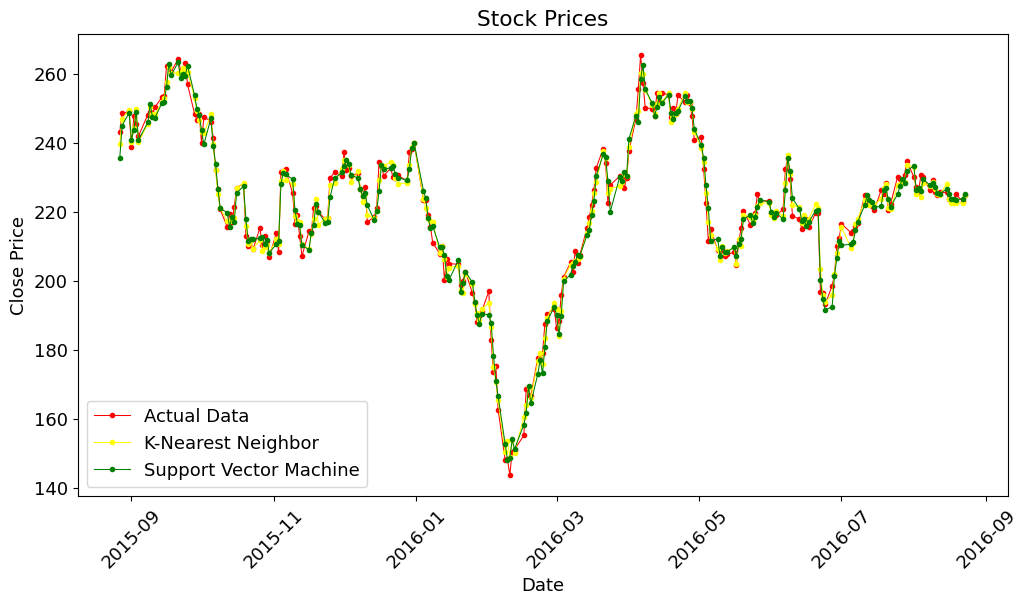

In [53]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:350], y_valid[100:350], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:350], pred2[100:350], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:350], pred1[100:350], color = 'green', marker='.', linewidth='0.75')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'K-Nearest Neighbor', 'Support Vector Machine'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [54]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
ann = Sequential()

ann.add(Dense(20, activation = 'relu', input_dim = 3))
ann.add(Dense(units = 75, activation = 'relu'))
ann.add(Dense(units = 75, activation = 'relu'))
ann.add(Dense(units = 75, activation = 'relu'))
ann.add(Dense(units = 1))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
ann.compile(optimizer = 'adam',loss = 'mean_squared_error')
ann.fit(s_train, y_train, batch_size = 70, epochs = 300)
pred6 = ann.predict(s_valid)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15872.1963
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16151.5205 
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13707.7520 
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9292.0527  
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1706.8236 
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 431.2862 
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 313.7671 
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 245.1545 
Epoch 9/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 228.9123 
Epoch 10/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205.1287 
Epoch 11/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.0007 
Epoch 12/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160.9898 
Epoch 13/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151.0261 
Epoch 14/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123.1798 
Epoch 15/300
18/18 ━━

In [58]:
import math
err6=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred6[i-1201]
    err6.append(a)
    SUM = SUM + pow(a,2)
SUM/492

array([5.140022], dtype=float32)

In [59]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred6[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

array([0.82693285], dtype=float32)

In [60]:
slp = Sequential()

# Adding the input layer and the first hidden layer
slp.add(Dense(16, input_dim = 3))

# Adding the output layer
slp.add(Dense(units = 1))

slp.compile(optimizer = 'adam',loss = 'mse')
slp.fit(s_train, y_train, batch_size =50, epochs = 300)
pred7 = slp.predict(s_valid)

Epoch 1/300


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16607.3301   
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16529.2227 
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15402.2002 
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16121.3076 
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15516.4121 
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15749.9541 
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15796.1904 
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15307.2559 
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14227.2236 
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14409.6494 
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15378.7129 
Epoch 12/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14587.2158 
Epoch 13/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13107.5654 
Epoch 14/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13310.2490 
Epoch 15/30

In [61]:
import math
err7=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred7[i-1201]
    err7.append(a)
    SUM = SUM + pow(a,2)
SUM/492

array([9.087761], dtype=float32)

In [62]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred7[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

array([1.0423323], dtype=float32)

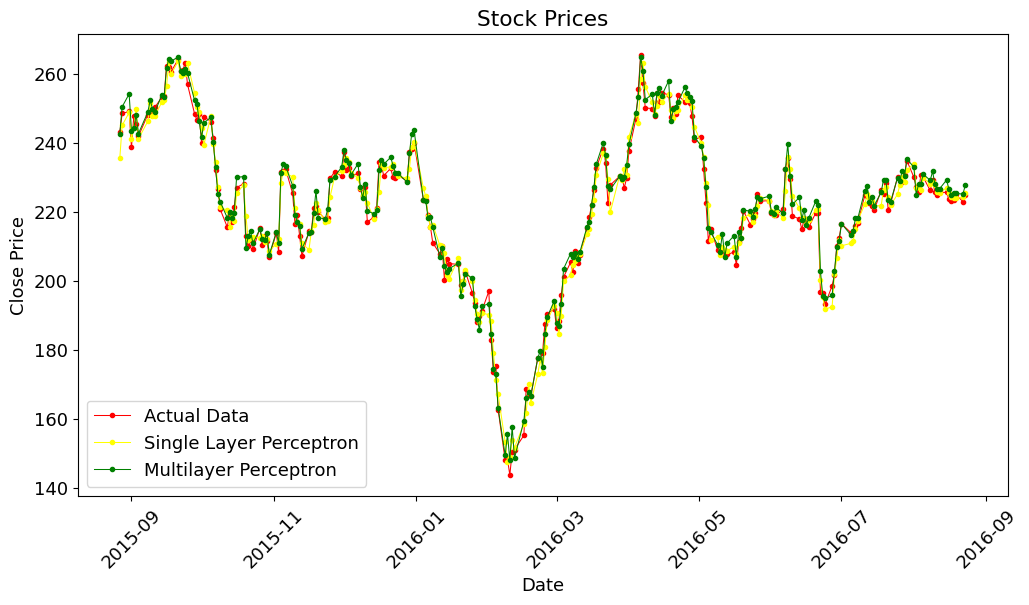

In [64]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:350], y_valid[100:350], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:350], pred7[100:350], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:350], pred6[100:350], color = 'green', marker='.', linewidth='0.75')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'Single Layer Perceptron', 'Multilayer Perceptron'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [65]:
df[4] = pd.to_numeric(df[4])
sma = df.iloc[1191:,4]

pred101=[]
for j in range(1201,1693):
    sum=0
    for i in range(0,10):
        sum=sum+sma[j-i]
    pred101.append(sum/10)
    
df[4] = pd.to_numeric(df[4])
sma = df.iloc[1186:,4]

pred102=[]
for j in range(1201,1693):
    sum=0
    for i in range(0,15):
        sum=sum+sma[j-i]
    pred102.append(sum/15)
    
df[4] = pd.to_numeric(df[4])
sma = df.iloc[1171:,4]

pred103=[]
for j in range(1201,1693):
    sum=0
    for i in range(0,30):
        sum=sum+sma[j-i]
    pred103.append(sum/30)

In [66]:
import math
err10=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred101[i-1201]
    err10.append(a)
    SUM = SUM + pow(a,2)
SUM/492

87.17483396615884

In [67]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred103[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

6.475195797383019

In [68]:
df[4] = pd.to_numeric(df[4])
sma = df.iloc[1191:,4]
pred121=[]
for j in range(1201,1693):
    sum=0
    for i in range(0,10):
        sum=sum+(sma[j-i]*((100/55)*(10-i)))
    pred121.append(sum/100)
    
df[4] = pd.to_numeric(df[4])
sma = df.iloc[1186:,4]
pred122=[]
for j in range(1201,1693):
    sum=0
    for i in range(0,15):
        sum=sum+(sma[j-i]*((100/120)*(15-i)))
    pred122.append(sum/100)
    
df[4] = pd.to_numeric(df[4])
sma = df.iloc[1171:,4]
pred123=[]
for j in range(1201,1693):
    sum=0
    for i in range(0,30):
        sum=sum+(sma[j-i]*((100/465)*(30-i)))
    pred123.append(sum/100)

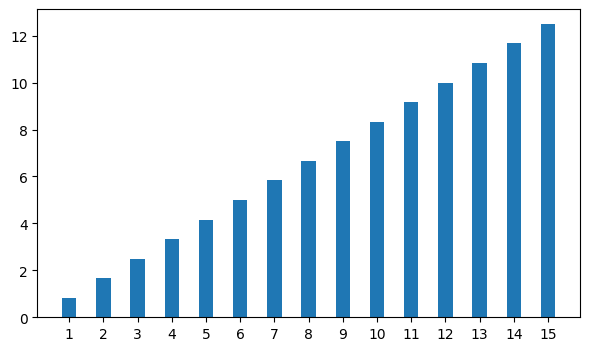

In [69]:
a=0
w=[]
d=[]
for i in range(0,15):
        a=(100/120)*(15-i)
        d.append(14-i+1)
        w.append(a)
    
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize = (7,4))

plt.bar(w, w, width=0.35)
plt.xticks(w, [15,14,13,12,11,10,9,8,7,6,5,4,3,2,1])
plt.show()

In [70]:
import math
err12=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred121[i-1201]
    err12.append(a)
    SUM = SUM + pow(a,2)
SUM/492

50.47875935192

In [71]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred121[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

2.505122824603608

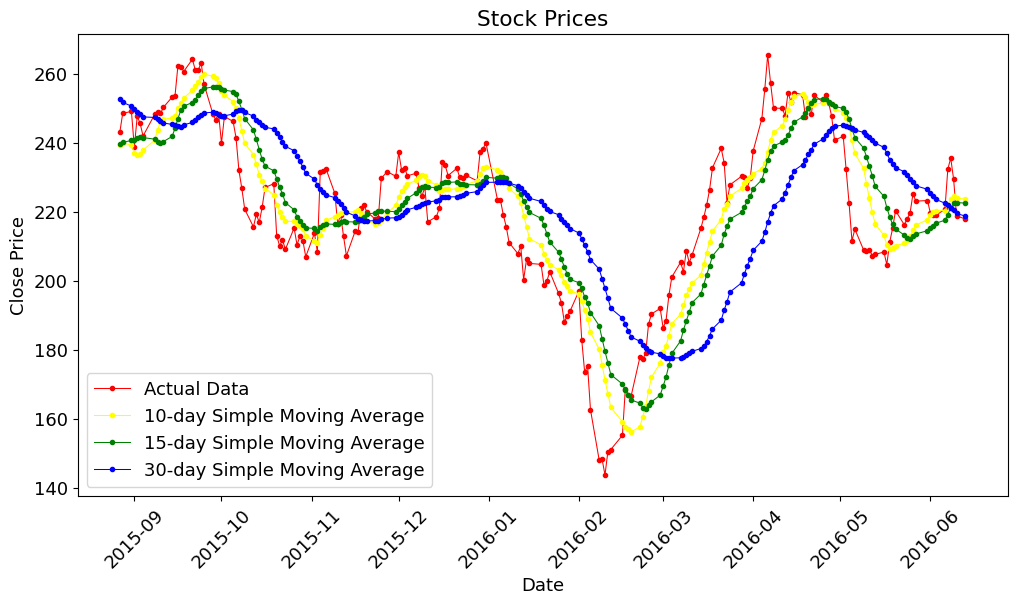

In [73]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:300], y_valid[100:300], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred101[100:300], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred102[100:300], color = 'green', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred103[100:300], color = 'blue', marker='.', linewidth='0.75')
plt.xticks(rotation=45)

plt.legend(['Actual Data', '10-day Simple Moving Average', '15-day Simple Moving Average', '30-day Simple Moving Average'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

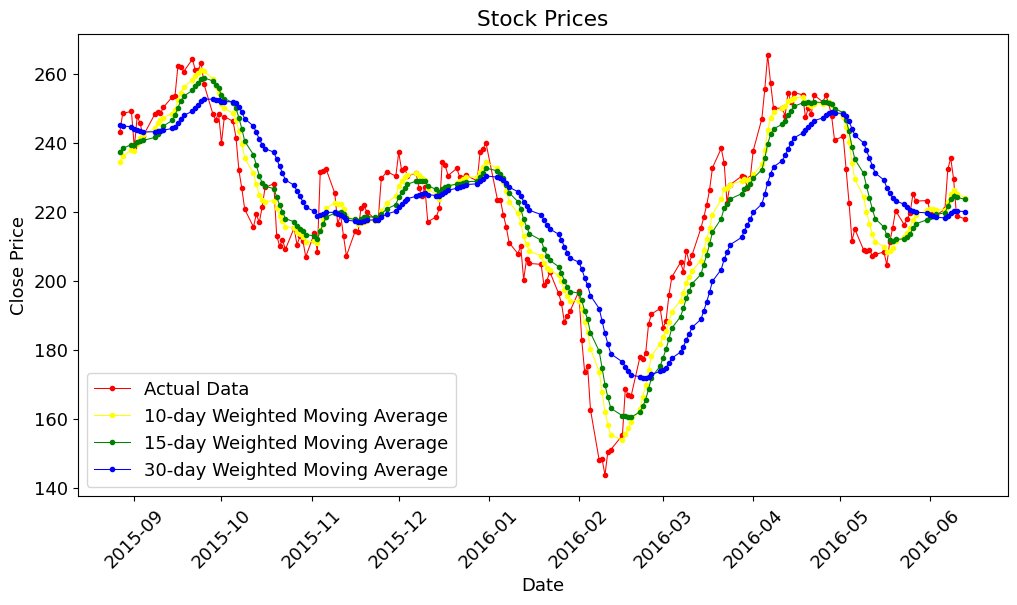

In [75]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:300], y_valid[100:300], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred121[100:300], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred122[100:300], color = 'green', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred123[100:300], color = 'blue', marker='.', linewidth='0.75')
plt.xticks(rotation=45)

plt.legend(['Actual Data', '10-day Weighted Moving Average', '15-day Weighted Moving Average', '30-day Weighted Moving Average'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

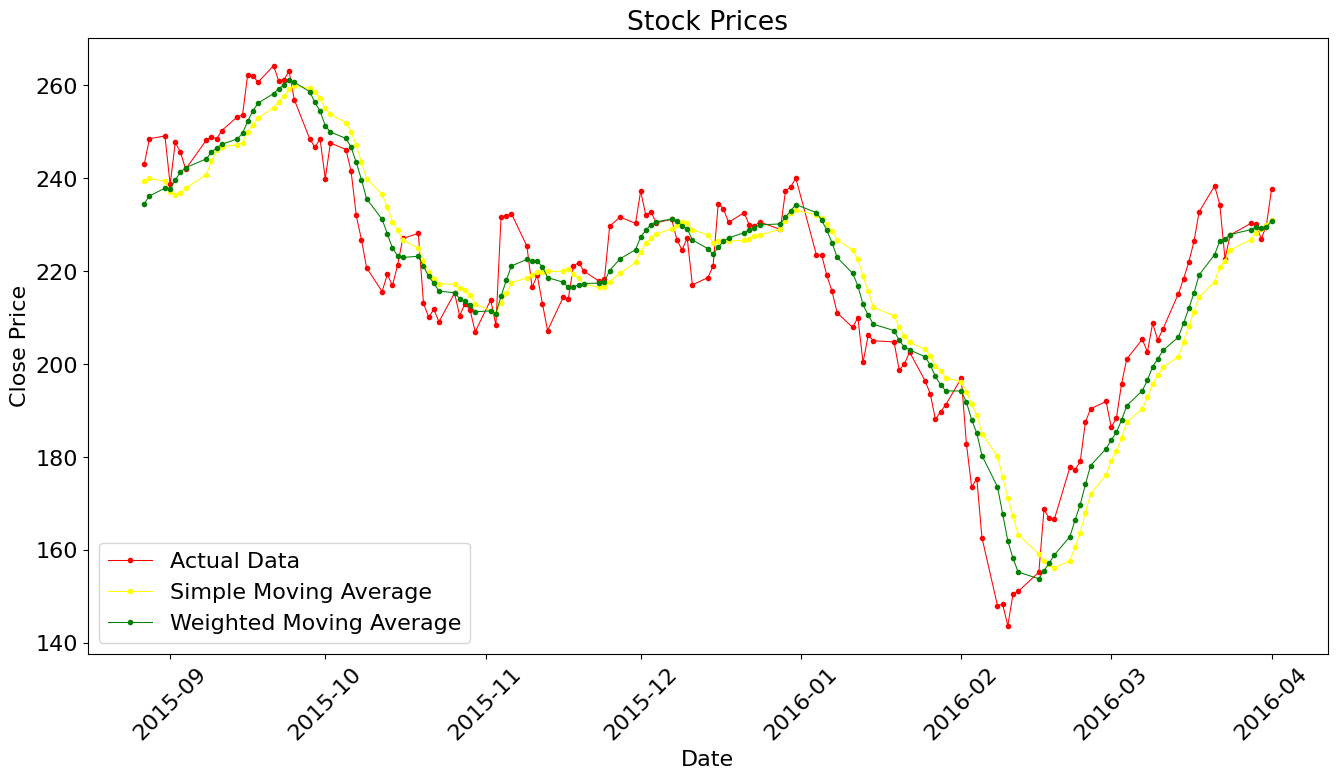

In [76]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(date_valid[100:250], y_valid[100:250], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:250], pred101[100:250], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:250], pred121[100:250], color = 'green', marker='.', linewidth='0.75')
plt.xticks(rotation=45)

plt.legend(['Actual Data', 'Simple Moving Average', 'Weighted Moving Average'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [77]:
a=0
pred201=[]
pred202=[]
pred203=[]
pred201.append(y_train[1200])
pred202.append(y_train[1200])
pred203.append(y_train[1200])
for i in range(1201,1693):
    a=pred201[i-1201]+(0.75)*(y_valid[i]-pred201[i-1201])
    pred201.append(a) 
    
for i in range(1201,1693):
    a=pred202[i-1201]+(0.5)*(y_valid[i]-pred202[i-1201])
    pred202.append(a) 
    
for i in range(1201,1693):
    a=pred203[i-1201]+(0.3)*(y_valid[i]-pred203[i-1201])
    pred203.append(a) 
#pred20[1200:]

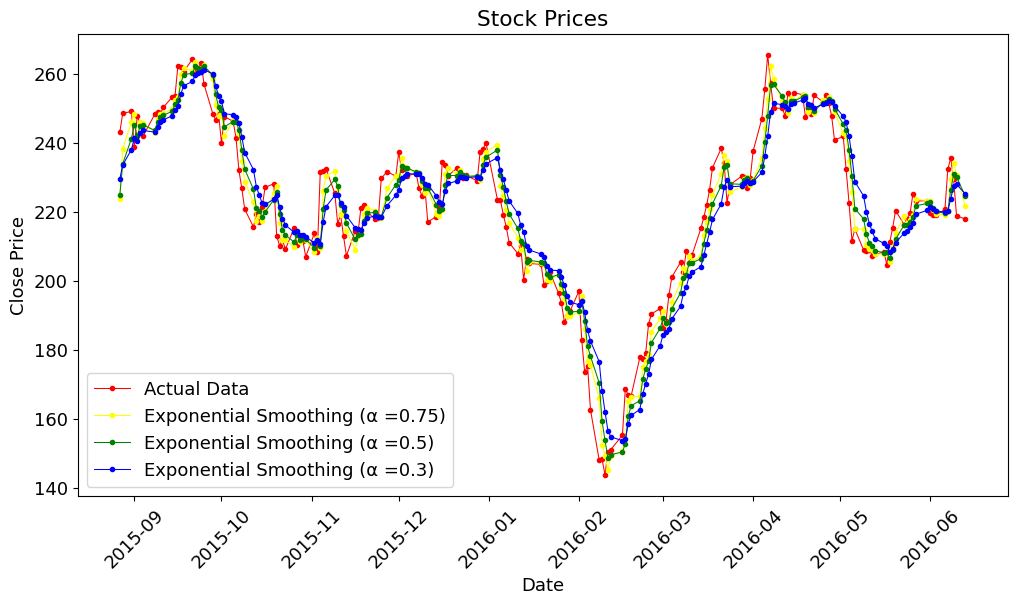

In [79]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:300], y_valid[100:300], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred201[100:300], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred202[100:300], color = 'green', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred203[100:300], color = 'blue', marker='.', linewidth='0.75')
plt.xticks(rotation=45)

plt.legend(['Actual Data', 'Exponential Smoothing (α =0.75)', 'Exponential Smoothing (α =0.5)', 'Exponential Smoothing (α =0.3)'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [80]:
import math
err20=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred201[i-1201]
    err20.append(a)
    SUM = SUM + pow(a,2)
SUM/492

31.875765952735996

In [81]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred203[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

2.7077277846540704

In [82]:
pred13=[]
pred13.append(y_train[1200])
for i in range(1201,1693):
    a=y_valid[i]
    pred13.append(a) 

In [83]:
import math
err13=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred13[i-1201]
    err13.append(a)
    SUM = SUM + pow(a,2)
SUM/492

28.835160526797978

In [84]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred13[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

1.7313217107141277

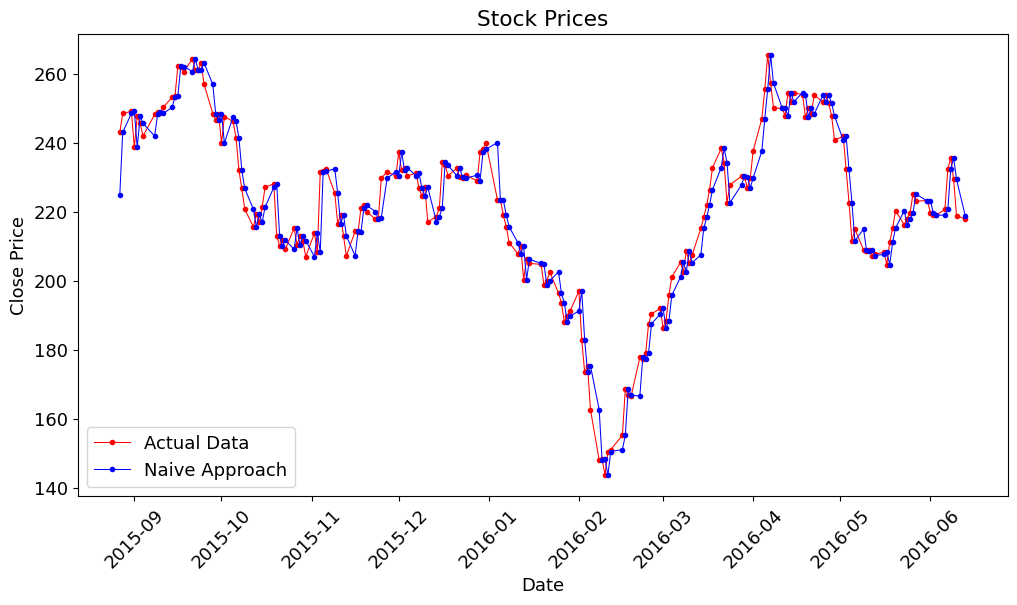

In [86]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:300], y_valid[100:300], color = 'red', marker='.', linewidth='0.75')
#ax.plot(date_valid[100:250], pred20[101:251], color = 'green', marker='.', linewidth='0.75')
ax.plot(date_valid[100:300], pred13[100:300], color = 'blue', marker='.', linewidth='0.75')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'Naive Approach'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

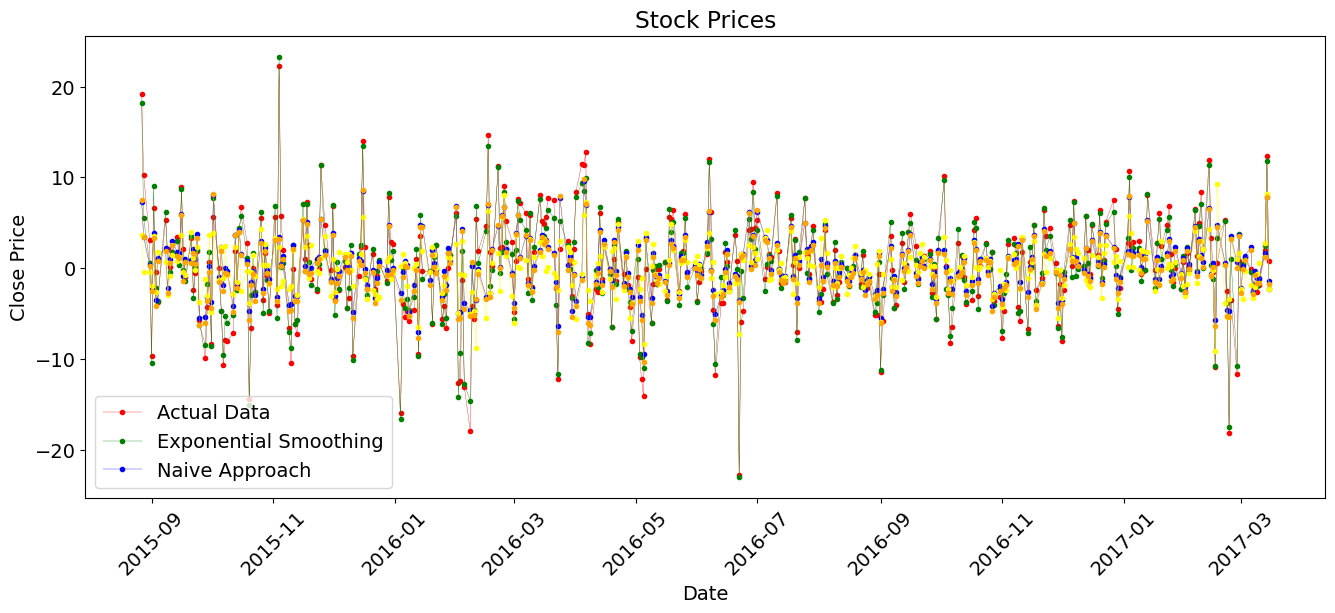

In [88]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(date_valid[100:490], err20[100:490], color = 'red', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err13[100:490], color = 'green', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err1[100:490], color = 'blue', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err5[100:490], color = 'yellow', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err7[100:490], color = 'orange', marker='.', linewidth='0.25')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'Exponential Smoothing', 'Naive Approach'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

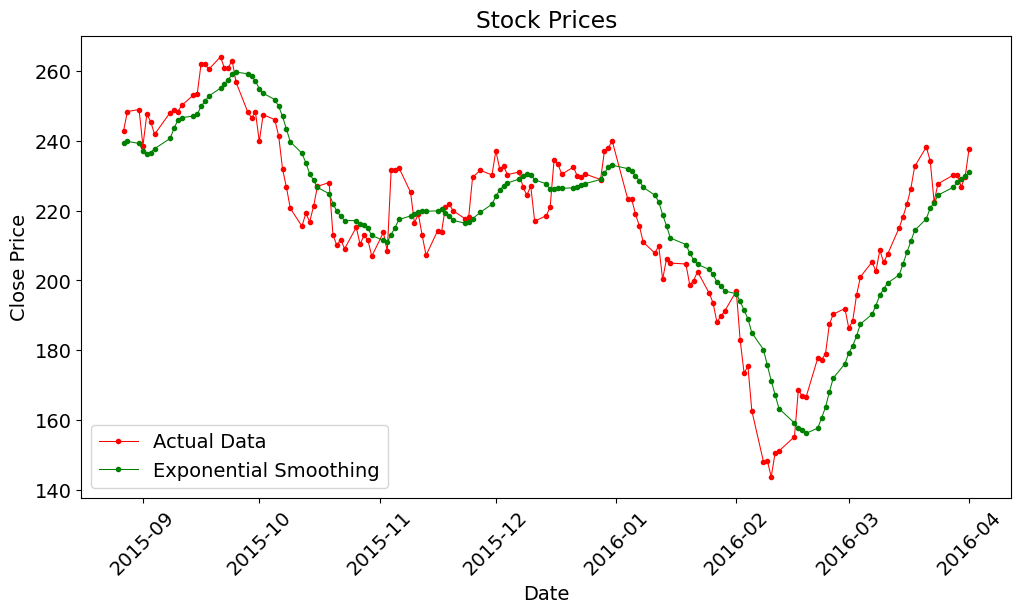

In [89]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:250], y_valid[100:250], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:250], pred101[100:250], color = 'green', marker='.', linewidth='0.75')
#ax.plot(date_valid[0:250], pred6[0:250], color = 'yellow', marker='.', linewidth='1.75')
plt.xticks(rotation=45)
plt.legend(['Actual Data', 'Exponential Smoothing', 'Naive Approach'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()